Support vetor machine is a category of supervised machine learning.
It is used for classification, regression and outlier detection
SVM works by mapping data to a high dimensional feature space so that data points can be categorized, even when the data are not linearly separable. This is done by kernel function of SVM classifier. A separator between the categories is found. then the data is transformed in such a way that the separator could be drawn as a hyperplane

Goal :
Use of SVM to build and train a model using human cell records, and classify cells to whether the samples are benign or malignant

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('cell_samples.csv')
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
#Distribution of classes
df['Class'].value_counts()

Class
2    458
4    241
Name: count, dtype: int64

<Axes: xlabel='Clump', ylabel='UnifSize'>

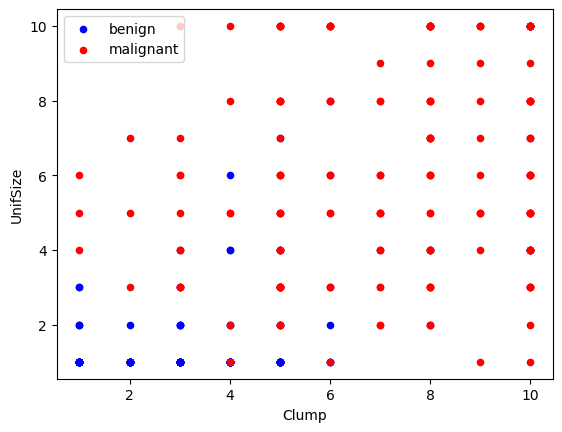

In [5]:
malignant_df = df[df['Class']==4][0:200]
benign_df = df[df['Class']==2][0:200]

axes = benign_df.plot(kind='scatter',x='Clump',y='UnifSize', color='blue', label='benign')
malignant_df.plot(kind='scatter',x='Clump',y='UnifSize', color='red', label='malignant', ax=axes)

In [6]:
df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [7]:
df = df[pd.to_numeric(df['BareNuc'], errors='coerce').notnull()]

In [8]:
df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [9]:
df['BareNuc'] = df['BareNuc'].astype('int')

In [10]:
df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [12]:
df.columns
'''['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']'''

feature_df = df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
X = np.asarray(feature_df) #Independent variable having 9 columns out of 11
y = np.asarray(df['Class']) #Dependent variable

In [13]:
X[0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]])

In [14]:
y[0:5]

array([2, 2, 2, 2, 2])

In [15]:
'''
df (100 rows) -> Train (80 rows) / test (20 rows)
Train(X,y) -> #Here X as 2D array and y is a one dimensional array
'''

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=41)

In [16]:
X_train.shape

(546, 9)

In [18]:
''' 
SV : suport vector : Those data point near to the hyperplane whose perpendicular distance to the hyperplane
if we summ that up and if that is maximum then such data point are called as support vector
'''
from sklearn import svm

clf = svm.SVC(kernel='linear', gamma='auto', C=2)
clf.fit(X_train, y_train)
''' 
Kernels :
Linear
Polynomial
Radial basis function
Sigmoid

With each kernel we need to define kernel coefficient called as gamma
C is for penalty'''

' \nKernels :\nLinear\nPolynomial\nRadial basis function\nSigmoid\n\nWith each kernel we need to define kernel coefficient called as gamma\nC is for penalty'

In [20]:
y_pred = clf.predict(X_test)

In [ ]:
''' 
Now we need to compare the y_pred (predicted data) to y_test (Actual data)'''

In [21]:
#Evaluating results

from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           2       0.98      0.94      0.96        96
           4       0.87      0.95      0.91        41

    accuracy                           0.94       137
   macro avg       0.92      0.94      0.93       137
weighted avg       0.94      0.94      0.94       137



In [22]:
print(confusion_matrix(y_test,y_pred))

[[90  6]
 [ 2 39]]


In [ ]:
''' 
precision = True positive /(True positive+False positive)
Support : How many instances of particular data are there 
'''